In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
newmag_84 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_84.txt')

In [5]:
newmag_85 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_85.txt')

In [8]:
newmag_86 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_86.txt')

In [15]:
newmag_87 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_87.txt')

In [17]:
newmag_88 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_88.txt')

In [18]:
newmag_89 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_89.txt')

In [19]:
newmag_91 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_91.txt')

In [10]:
newmag_92 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_92.txt')

In [21]:
newmag_94 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_94.txt')

In [22]:
newmag_95 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_95.txt')

In [23]:
newmag_97 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_97.txt')

In [5]:
newmag_99 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_99.txt')

In [68]:
print(newmag_84)
print(newmag_85)
print(newmag_86)
print(newmag_87)

[-16.8033454  -16.80334549 -16.80334559 ... -23.62510164 -23.66016366
 -23.71779653]
[-16.59638914 -16.59638924 -16.59638933 ... -23.58891192 -23.6241428
 -23.6820751 ]
[-16.39196477 -16.39196487 -16.39196497 ... -23.55393252 -23.58937244
 -23.64756927]
[-16.18849639 -16.18849649 -16.18849659 ... -23.51983955 -23.55543569
 -23.61391526]


In [25]:
print(newmag_88)
print(newmag_89)
print(newmag_91)
print(newmag_92)
print(newmag_94)
print(newmag_95)
print(newmag_97)
print(newmag_99)

[-15.98660231 -15.98660242 -15.98660252 ... -23.4866363  -23.52238877
 -23.58114349]
[-15.7862735  -15.78627361 -15.78627371 ... -23.45431377 -23.49023152
 -23.54925423]
[-15.39320692 -15.39320704 -15.39320715 ... -23.39257999 -23.42883497
 -23.48837156]
[-15.19837208 -15.19837219 -15.19837231 ... -23.36264436 -23.39905791
 -23.45884601]
[-14.22941673 -14.22941687 -14.22941702 ... -23.26038465 -23.29763116
 -23.35886628]
[-12.89734296 -12.89734318 -12.89734339 ... -23.12015307 -23.15642714
 -23.21613113]
[-12.56231122 -12.56231145 -12.56231168 ... -23.00165844 -23.03707634
 -23.09524871]
[-12.42343613 -12.42343636 -12.4234366  ... -22.90684043 -22.94228826
 -23.00048483]


In [27]:
print(newmag_84.shape)
print(newmag_85.shape)
print(newmag_86.shape)
print(newmag_87.shape)
print(newmag_88.shape)
print(newmag_89.shape)
print(newmag_91.shape)
print(newmag_92.shape)
print(newmag_94.shape)
print(newmag_95.shape)
print(newmag_97.shape)
print(newmag_99.shape)

(26419790,)
(26407747,)
(26393338,)
(26374834,)
(26350859,)
(26325572,)
(26274211,)
(26241654,)
(26181822,)
(26152243,)
(26088686,)
(26029862,)


## load Vpeak data

In [70]:

subhalo = np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_99.txt')

orphan = np.load('/home/yunzheng/mock/orphan_new/final_selection_new/snapshot_99/orphantable_final.npy')

vpeak = np.concatenate((subhalo[:,4], orphan[:,4]))
stag = np.argsort(vpeak)
vpeak = vpeak[stag]

In [72]:
vpeak.shape

(26029862,)

In [31]:
box_size = 600
from AbundanceMatching import *

In [32]:
nd_halos = calc_number_densities(vpeak,600)

In [63]:
nd_halos

array([1.20508620e-01, 1.20508616e-01, 1.20508611e-01, ...,
       1.38888889e-08, 9.25925926e-09, 4.62962963e-09])

Text(0, 0.5, 'Abundance of subhalos')

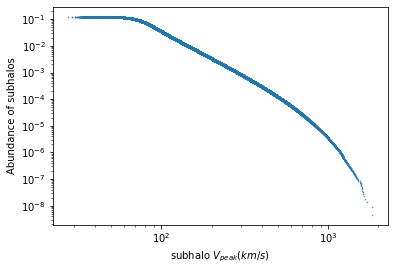

In [36]:
plt.scatter(vpeak,nd_halos,s =0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'subhalo $ V_{peak} (km/s) $')
plt.ylabel(r'Abundance of subhalos')

In [37]:
np.save('/home/yunzheng/mock/abundance_new/data/largedata/vpeak.npy',vpeak)

## Abundance Matching

In [38]:

###luminosity function###
#############################
def luminosity_evolution(M,M_star0,phi_star0,alpha,P,Q,z):
    M_star = M_star0 - Q * (z - 0.1)
    phi_star = phi_star0 * np.power(10,0.4 * P * z)
    y = 0.4 * np.log(10) * phi_star * (np.power(10,(0.4 * (M_star - M)))) ** (1 + alpha) * np.exp(- 10 ** (0.4 * (M_star - M)))
    return y


M_star_Blanton = -20.44
phi_star_Blanton = 0.0149
P_Blanton = 0.18
Q_Blanton = 1.62
alpha_Blanton = -1.05


M_star_Loveday = -20.70
phi_star_Loveday = 0.0094
P_Loveday = 1.8
Q_Loveday = 0.7
alpha_Loveday = -1.23

def omega(z):
    y = (1 + np.exp(-100 * (z - 0.15))) ** (-1)
    return y

def phi_total(M,z):
    y = (1 - omega(z)) * luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z) + omega(z) * luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
    return y

def luminosity_final(M,z):
    if z <= 0.1:
        phi_1 = luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z)
        return phi_1
    if 0.1 < z < 0.2:
        phi_2 = phi_total(M,z)
        return phi_2
    if z >= 0.2:
        phi_3 = luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
        return phi_3

In [64]:
nstep=1000
lfx0 = np.linspace(-25,-10,nstep)
lfy0 = luminosity_final(lfx0,0.1)
af_test = AbundanceFunction(lfx0,lfy0,(-25,-10))
catalog_test = af_test.match(nd_halos)

In [61]:
catalog_test

array([-12.69358107, -12.6935813 , -12.69358153, ..., -23.07030386,
       -23.10570069, -23.16383038])

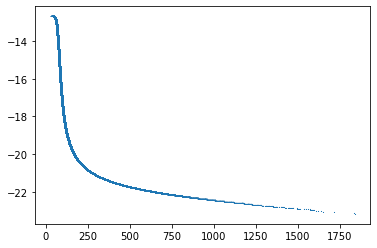

In [46]:
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

### compare with dr7

In [47]:
lfBlanton = np.loadtxt('/home/yunzheng/code/yanglei/yanglei/data/full1/vmax/lfvmax-q2.00a-1.00.dr72full1.dat')
lfB03x=lfBlanton[:,0]
lfB03y=lfBlanton[:,1]

af = AbundanceFunction(lfB03x, lfB03y, (-27, -5))
catalog = af.match(nd_halos)

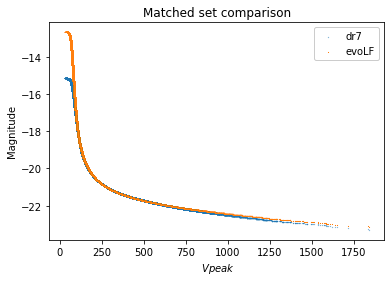

In [49]:
plt.scatter(vpeak,catalog,s = 0.05)
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

plt.title(r'Matched set comparison')
plt.xlabel(r' $Vpeak$ ')
plt.ylabel(r'Magnitude')
plt.legend(('dr7','evoLF'),facecolor='white', framealpha=1)
plt.savefig('/home/yunzheng/mock/abundance_new/picture/Matchcomparision_final.pdf',dpi = 60)

In [60]:
catalog

array([-15.16929239, -15.16929246, -15.16929254, ..., -23.19565508,
       -23.23498981, -23.29965742])

In [65]:
catalog_test

array([-12.68628987, -12.6862901 , -12.68629034, ..., -23.07030111,
       -23.10569808, -23.16382802])

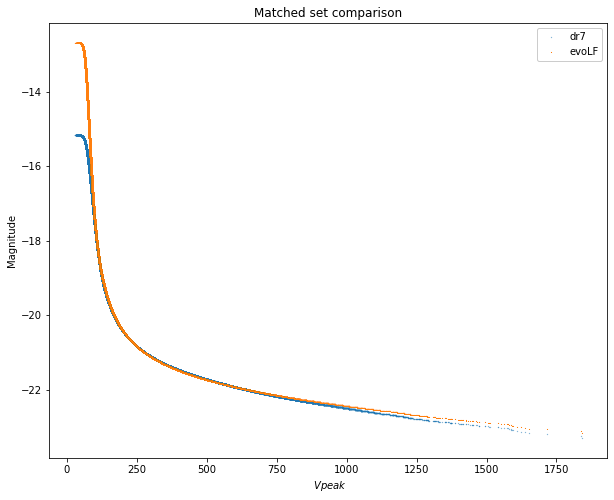

In [67]:
plt.figure(figsize = (10,8))

plt.scatter(vpeak,catalog,s = 0.05)
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

plt.title(r'Matched set comparison')
plt.xlabel(r' $Vpeak$ ')
plt.ylabel(r'Magnitude')
plt.legend(('dr7','evoLF'),facecolor='white', framealpha=1)
plt.savefig('/home/yunzheng/mock/abundance_new/picture/Matchcomparision_final.png',format = 'png',dpi = 60)

## scatter

In [74]:
def scatter(M):
    y = 0.8 + 0.4 * np.tanh(M + 20)
    return y

In [6]:
newmag_99

array([-12.42343613, -12.42343636, -12.4234366 , ..., -22.90684043,
       -22.94228826, -23.00048483])

(-17.0, -23.0)

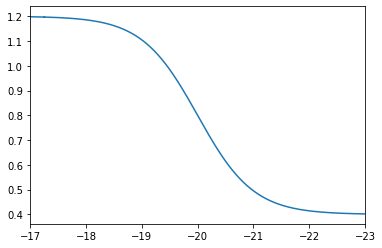

In [8]:
plt.plot(newmag_99,scatter(newmag_99))
plt.xlim(-17,-23)

### truncnorm test

In [77]:
from scipy.stats import truncnorm

In [40]:
mu, sigma = 5, 0.7
lower, upper = mu - 2.5 * sigma, mu + 2.5 * sigma 

X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

M = truncnorm((lower - mu) / sigma, (upper - mu) / sigma)


In [35]:
r = truncnorm.rvs(lower, upper, size=1000)

(array([0.02046072, 0.03610715, 0.04934644, 0.06619644, 0.08786073,
        0.11795002, 0.14803931, 0.17692503, 0.24312148, 0.27742327,
        0.28825541, 0.35746078, 0.3526465 , 0.40861258, 0.40259472,
        0.38935543, 0.41763937, 0.34783221, 0.32496435, 0.29607863,
        0.26117505, 0.23890898, 0.17933218, 0.14322503, 0.11614467,
        0.09929466, 0.06740001, 0.04814287, 0.03189465, 0.02346965]),
 array([-2.49545308, -2.32928101, -2.16310893, -1.99693686, -1.83076478,
        -1.66459271, -1.49842064, -1.33224856, -1.16607649, -0.99990441,
        -0.83373234, -0.66756026, -0.50138819, -0.33521612, -0.16904404,
        -0.00287197,  0.16330011,  0.32947218,  0.49564425,  0.66181633,
         0.8279884 ,  0.99416048,  1.16033255,  1.32650463,  1.4926767 ,
         1.65884877,  1.82502085,  1.99119292,  2.157365  ,  2.32353707,
         2.48970914]),
 <BarContainer object of 30 artists>)

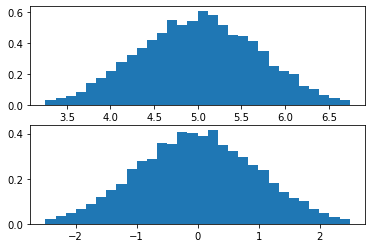

In [42]:

from pylab import *

figure(1)
subplot(2,1,1)
plt.hist(X.rvs(10000), density=True, bins=30)   # 截断正态分布的直方图
subplot(2,1,2)
plt.hist(M.rvs(10000), density=True, bins=30)

In [46]:
lllll = M.rvs(1)

In [47]:
lllll

array([-0.35739693])

### adding scatter

In [125]:
def mag_scatter(Mag):
    mu = Mag
    sigma = scatter(Mag)
    lower, upper = mu - 2.5 * sigma, mu + 2.5 * sigma 
    G = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma) 
    return (G.rvs(1)[0])

In [131]:
mags = []
for mag in newmag_99:
    mags.append(mag_scatter(mag))

KeyboardInterrupt: 

In [153]:
mags

[-14.949458009328628,
 -14.449468154859712,
 -11.752407213301133,
 -11.647329836759127,
 -12.924327679434985,
 -13.374029012690862,
 -14.5542962361531,
 -12.14044549976052,
 -12.980444527398461,
 -11.44047958063424,
 -13.063523851230537,
 -12.332201215624767,
 -11.687456574890978,
 -11.030045683297255,
 -14.916293862646155,
 -11.551482760613228,
 -12.390920183688522,
 -14.751824732556589,
 -10.741777002647463,
 -14.495153793807164,
 -13.85824244574349,
 -12.428481348968761,
 -12.00251210375173,
 -12.335681788699569,
 -12.888091088371171,
 -10.783188950133095,
 -9.976404404029156,
 -9.486397633822833,
 -10.27338715768565,
 -14.065159297211073,
 -12.26280564622181,
 -11.307942848745322,
 -12.825321162598112,
 -11.500328687637886,
 -14.351371997731167,
 -11.918901397146044,
 -11.540475902765676,
 -11.543199258927338,
 -12.777744608170737,
 -10.346927585732345,
 -13.771718404008885,
 -11.154047301712056,
 -12.733659659587662,
 -12.386583639192358,
 -14.501488007436707,
 -11.486375746283722

In [83]:
testmag = np.array(mags,dtype = 'float32')

In [112]:
cut_v = np.array(vpeak[:len(mags)],dtype = 'float32')

In [113]:
cut_v.shape

(6730745,)

#### Hexbin test

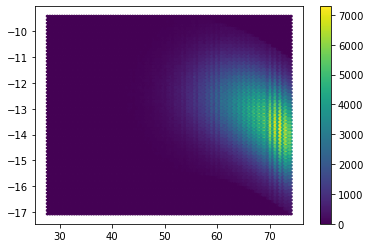

In [123]:
plt.hexbin(cut_v,mags)
plt.colorbar()
# plt.plot(cut_v, -13*np.ones(len(cut_v)), 'r-', lw = 2)

In [135]:
cut_new = np.array(vpeak[:len(mags)],dtype = 'float32')

In [136]:
cut_new.shape

(412594,)

In [138]:
mags_new = mags[::-1]

In [141]:
mags_new[-1]

-14.949458009328628

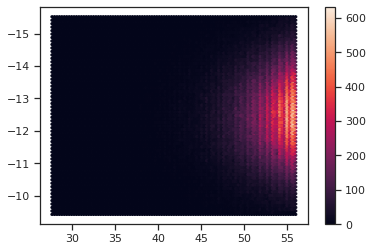

In [143]:
plt.hexbin(cut_new,mags)
plt.gca().invert_yaxis()
plt.colorbar()

#### Seaborn test

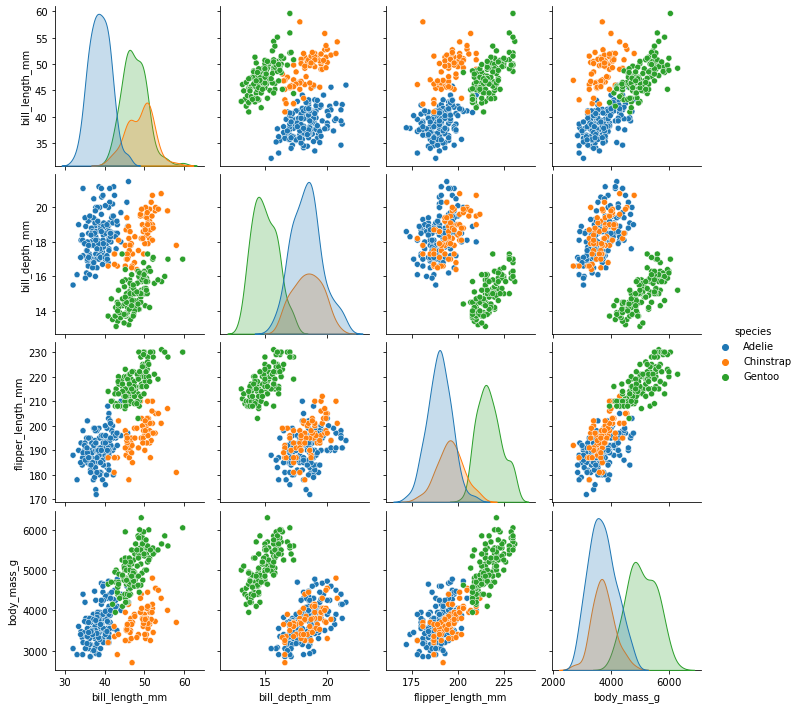

In [102]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [107]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

In [100]:
mean = [0, 1]
cov = [(1, .5), (.5, 1)]


In [ ]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex", color="k")

In [113]:
sns.set_theme(style="ticks")

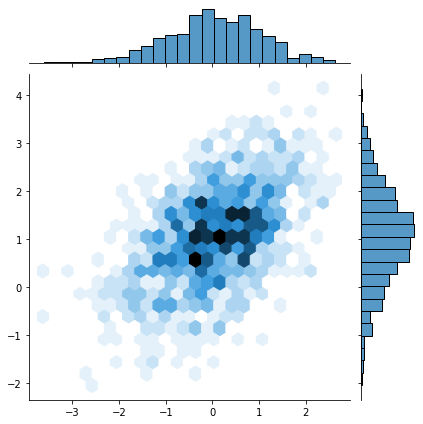

In [161]:
sns.jointplot(x=x, y=y, kind="hex")

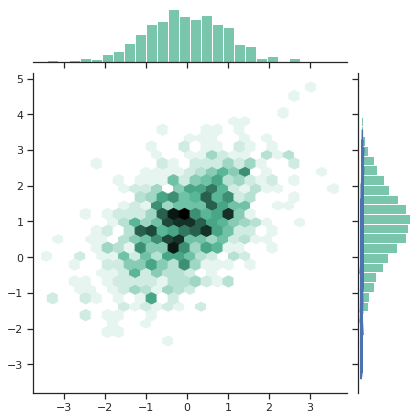

In [117]:
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
plt.plot(y,x)

In [184]:
sns.jointplot?

TypeError: unhashable type: 'numpy.ndarray'

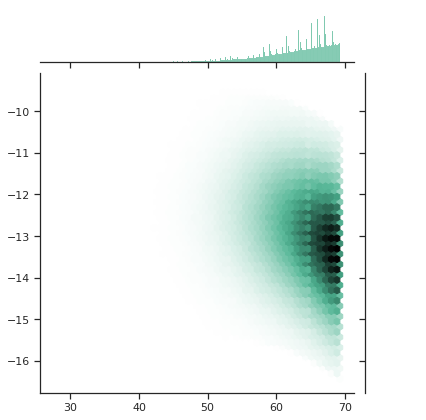

In [120]:
sns.jointplot(x=cut_v, y=mags, kind="hex", color="#4CB391")

N= 6730745


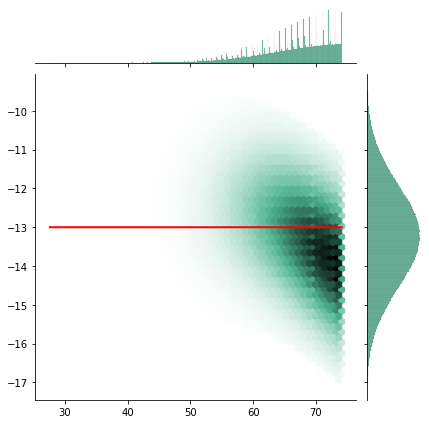

In [160]:
print('N=',len(mags))

myplot = sns.jointplot(x=cut_v, y=mags, kind="hex", color="#4CB391")
myplot.ax_joint.plot(cut_v, -13*np.ones(len(cut_v)), 'r-', lw = 2)

### scatter plot

In [144]:
sca = np.loadtxt('/home/yunzheng/mock/abundance_new/data/scattermag/mag_99.txt')

In [145]:
sca.shape

(26029862,)

In [152]:
sca

array([-12.98960868, -14.92449484, -13.41475318, ..., -23.10870812,
       -22.44564862, -22.92224159])

In [155]:
vpeak

array([  27.64322853,   29.2680912 ,   29.31170654, ..., 1716.5234375 ,
       1837.66821289, 1841.12133789])

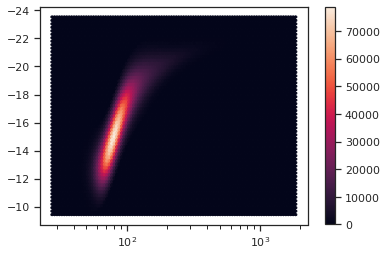

In [164]:
plt.hexbin(vpeak,sca,xscale = 'log')
plt.gca().invert_yaxis()
plt.colorbar()

In [157]:
max(vpeak)

1841.121337890625

## new Mag

In [177]:
stag = np.argsort(-sca)
sca_mag = sca[stag]

In [178]:
sca_mag

array([ -9.42940987,  -9.43048366,  -9.43071771, ..., -23.4486466 ,
       -23.46637092, -23.5352586 ])

In [150]:
stag

array([22539162, 22538303, 22539492, ...,    12340,    41932,     3344])

In [180]:
new_mag = newmag_99[stag]

In [176]:
new_mag.shape

(26029862,)

In [149]:
plt.hexbin(vpeak,new_mag,xscale = 'log',cmap = 'viridis')
plt.gca().invert_yaxis()
plt.plot(vpeak,newmag_99,color = 'white')
plt.colorbar()
plt.title(r'absolute magnitudes with scatter')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$M_{r}$')

# plt.savefig('/home/yunzheng/mock/abundance_new/picture/M_scatter.pdf',dpi = 100)

NameError: name 'new_mag' is not defined

In [182]:
newmag_99

array([-12.42343613, -12.42343636, -12.4234366 , ..., -22.90684043,
       -22.94228826, -23.00048483])

N= 26029862


AttributeError: 'JointGrid' object has no attribute 'xscale'

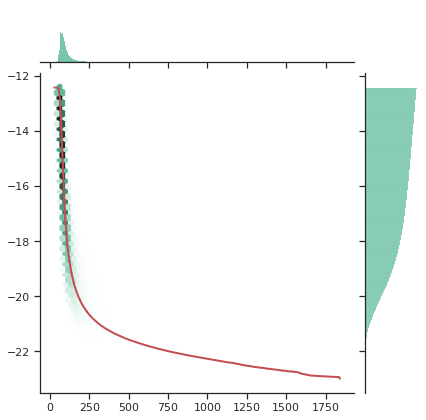

In [194]:
print('N=',len(new_mag))
snsplot = sns.jointplot(x=vpeak, y=new_mag, kind="hex", color="#4CB391")
snsplot.ax_joint.plot(vpeak,newmag_99, 'r-', lw = 2)
snsplot.xscale('log')

Object `sns.plot` not found.


### snapshot 92

In [5]:
sca_92 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/scattermag/mag_92.txt')

In [6]:
vpeak_92 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/largedata/vpeak_92.txt')

In [7]:
sca_92.shape

(26241654,)

In [8]:
vpeak_92.shape

(26241654,)

In [11]:
stag_92 = np.argsort(-sca_92)
sca_mag_92 = sca_92[stag_92]

In [12]:
new_mag_92 = newmag_92[stag_92]

In [13]:
new_mag_92

array([-15.19880718, -15.20075222, -15.19876185, ..., -23.18694452,
       -23.07630745, -23.11460951])

Text(50, -22, '$z = 0.25$')

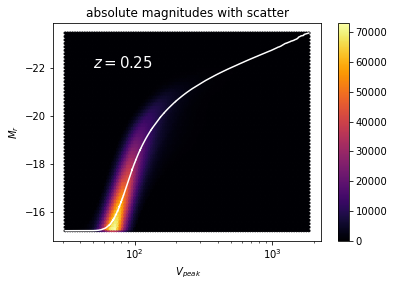

In [171]:
plt.hexbin(vpeak_92,new_mag_92,xscale = 'log',cmap = 'inferno')
plt.gca().invert_yaxis()
plt.plot(vpeak_92,newmag_92,color = 'white',label = '$z = 0.25$')
plt.colorbar()
plt.title(r'absolute magnitudes with scatter')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$M_{r}$')
plt.text(50,-22,'$z = 0.25$',size = 15, color = "white",weight = "light")

# plt.savefig('/home/yunzheng/mock/abundance_new/picture/M_scatter_92.pdf',dpi = 100)

In [14]:
max(vpeak_92)

1835.6221923828125

In [ ]:
min(vpeak_92)

In [136]:
vpeak_92

array([  31.40896988,   32.20510864,   32.28962708, ..., 1686.68041992,
       1694.80126953, 1835.62219238])

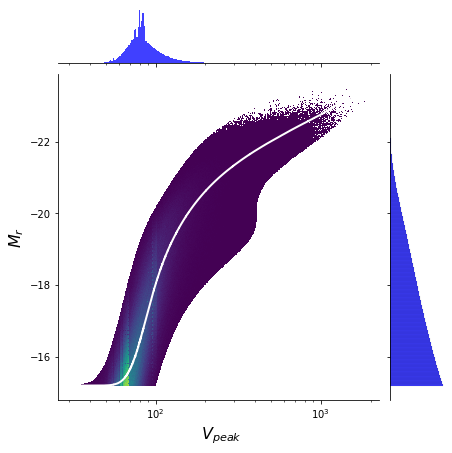

In [33]:
myplot1 = sns.jointplot(x = vpeak_92,y = new_mag_92,kind="hist", marginal_kws={'color': 'blue'})
myplot1.ax_joint.plot(vpeak_92, newmag_92, 'w-', lw = 2)

myplot1.fig.axes[0].invert_yaxis()
myplot1.ax_joint.set_xscale('log')

myplot1.set_axis_labels(r' $V_{peak}$', r'$M_{r}$', fontsize=16)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
# cbar_ax = myplot1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)

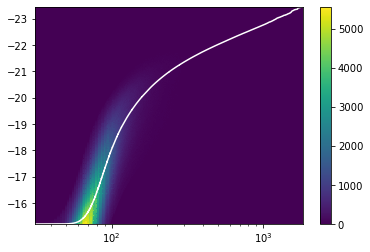

In [31]:
plt.hist2d(vpeak_92,new_mag_92,bins = 1000)
plt.gca().invert_yaxis()
plt.plot(vpeak_92,newmag_92,color = 'white',label = '$z = 0.25$')
plt.xscale('log')
plt.colorbar()
plt.show()

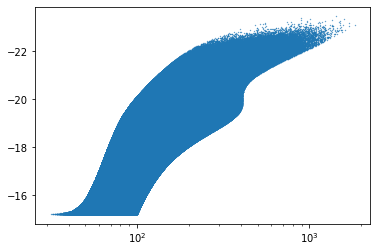

In [172]:
plt.scatter(vpeak_92,new_mag_92,s= 0.1)
plt.xscale('log')
plt.gca().invert_yaxis()